# Answers to Hdip Data Analytics - Applied Statistics Module Problems
---
Problems: https://github.com/ianmcloughlin/applied-statistics/blob/main/assessment/problems.md

In [2]:
# Import required libraries

# The numpy library provides support for efficient numerical computations and randomization.
# See: https://numpy.org/doc/stable/
import numpy as np
# The matplotlib.pyplot module offers plotting functions for data visualization.
# See: https://matplotlib.org/stable/api/pyplot_api.html
import matplotlib.pyplot as plt
# The seaborn library provides a high-level interface for statistical graphics.
# See: https://seaborn.pydata.org/api.html
import seaborn as sns
# The math module includes mathematical functions and constants.
# See: https://docs.python.org/3/library/math.html#math.comb
from math import comb

In [3]:
# Set Seaborn style
# See: https://seaborn.pydata.org/generated/seaborn.set_theme.html
sns.set_theme(style="whitegrid", context="notebook")

## Problem 1: Extending the Lady Tasting Tea

This section demonstrates a simulation of an extended version of the famous 'Lady Tasting Tea' experiment. I will simulate the probability that a participant correctly identifies all cups purely by chance. Then, I will compare the extended experiment (12 cups: 8 tea-first, 4 milk-first) with the original design (8 cups: 4 tea-first, 4 milk-first).

### Step 1: Understanding the experiment setup
---

**Original experiment:** 8 cups (4 tea-first, 4 milk-first)

**Extended experiment:** 12 cups (8 tea-first, 4 milk-first)

The participant tries to identify which cups are which. I simulate random guessing many times to estimate the probability of correctly identifying all cups.


### Step 2: Define simulation function
---

This function simulates the famous “Lady Tasting Tea” experiment to estimate the probability that she could correctly identify all cups by random chance. It uses random shuffling (np.random.permutation) and counts how many times the guesses match the actual order. The result approximates the p-value of the experiment.

In [4]:

def simulate_lady_tasting_tea(n_cups, n_tea_first, n_trials=100000):
    """Simulate the Lady Tasting Tea experiment.

    n_cups: total cups
    n_tea_first: number of tea-first cups
    n_trials: number of simulations
    
    Returns estimated probability of correctly guessing all cups."""
    # Initialize a counter for the number of times a random guess matches the true order
    correct = 0
    # Create an array representing the actual cup order
    # 1 represents tea poured first, 0 represents milk poured first
    # See: https://numpy.org/doc/stable/reference/generated/numpy.array.html
    cups = np.array([1]*n_tea_first + [0]*(n_cups - n_tea_first))
    # Repeat the simulation for n_trials
    for _ in range(n_trials):
        # Shuffle the cups randomly to simulate a guess
        # See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
        guess = np.random.permutation(cups)  # random guessing
        # Check if the guess exactly matches the actual cup order
        # See: https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html
        if np.array_equal(guess, cups):
            # Increment the counter if the guess is completely correct
            correct += 1
    # Return the estimated probability of a correct guess
    return correct / n_trials


### Step 3: Run simulations
---

This ensures that all random operations in NumPy, including shuffling the cups, are reproducible. By setting a seed, every time I run the notebook, I will get the same simulation results, which is important for consistency and verification in applied statistics.

In [5]:
# Set random seed for reproducibility
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(42)

I run the simulations for the two experiment designs. 

For the original experiment, I call `simulate_lady_tasting_tea(8, 4)`, which represents 8 cups with 4 tea-first. This function returns the estimated probability of a perfect guess occurring purely by chance for this setup. 

For the extended experiment, I call `simulate_lady_tasting_tea(12, 4)`, which represents 12 cups with 8 tea-first, and again returns the estimated probability of correctly guessing all cups by chance.

In [6]:
# Run the simulation for both experiment designs.
prob_original = simulate_lady_tasting_tea(8, 4)
prob_extended = simulate_lady_tasting_tea(12, 4)

In [7]:
# Print estimated probabilities with appropriate decimal precision
print(f"Estimated probability (Original 8-cup): {prob_original:.8f}")
print(f"Estimated probability (Extended 12-cup): {prob_extended:.12f}")

Estimated probability (Original 8-cup): 0.01459000
Estimated probability (Extended 12-cup): 0.001960000000


### Step 4: Theoretical probability and validation
---

The theoretical probability is calculated to validate the simulation results. As the Lady Tasting Tea experiment has a known exact solution based on counting the number of possible arrangements, comparing the simulated probability with the theoretical value helps confirm that the simulation is correctly implemented. This validation strengthens the reliability of the results and demonstrates understanding of both analytical and simulation based statistical methods.

In [8]:
# Calculate theoretical probabilities using combinatorial formulas.
prob_theoretical_original = 1 / comb(8, 4)
prob_theoretical_extended = 1 / comb(12, 4)

print(f"Theoretical probability (Original 8-cup): {prob_theoretical_original:.8f}")
print(f"Theoretical probability (Extended 12-cup): {prob_theoretical_extended:.8f}")

Theoretical probability (Original 8-cup): 0.01428571
Theoretical probability (Extended 12-cup): 0.00202020


### Step 5: Compare the results
---

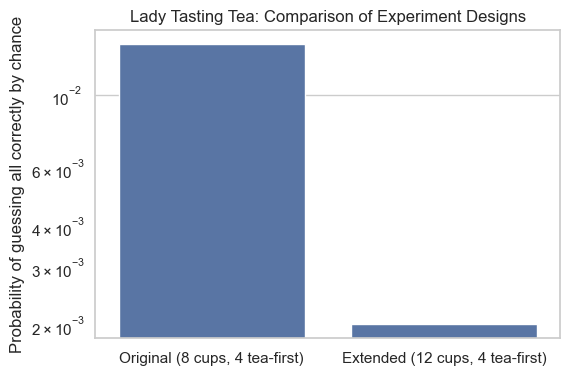

In [10]:
# The seaborn.barplot function creates a bar plot for visual comparison.
# See: https://seaborn.pydata.org/generated/seaborn.barplot.html
# The matplotlib.pyplot.yscale function sets the scaling of the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html

plt.figure(figsize=(6,4))

labels = ["Original (8 cups, 4 tea-first)", "Extended (12 cups, 4 tea-first)"]
values = [prob_theoretical_original, prob_theoretical_extended]

sns.barplot(x=labels, y=values)
plt.ylabel("Probability of guessing all correctly by chance")
plt.title("Lady Tasting Tea: Comparison of Experiment Designs")
plt.yscale("log")  # probabilities differ substantially
plt.show()

### Step 6: Interpretation
---

In the original experiment with 8 cups (4 tea-first and 4 milk-first), the probability of correctly identifying all cups by random guessing is relatively small. When the experiment is extended to 12 cups while keeping the number of tea-first cups fixed at 4, the number of possible arrangements increases substantially.

As a result, the probability of correctly guessing all cups by chance becomes even smaller in the extended experiment. This shows that increasing the total number of cups, while keeping the number of tea-first cups constant, makes the test more stringent and reduces the likelihood of success due to random guessing.

Therefore, the extended design provides stronger evidence against chance performance and increases the reliability of conclusions drawn from the experiment.

## Problem 2: Normal Distribution
---

Problem statement:

 Generate 100,000 samples of size 10 from the standard normal distribution.
 For each sample, compute the standard deviation using:
   - ddof=1 (sample SD)
   - ddof=0 (population SD)


 Plot histograms of both sets of SD values on the same axes with transparency.

 
 Describe the differences and explain how you expect these differences to change as sample size increases.

### Step 1: Set up the simulation
---

In [12]:
# Set random seed for reproducibility
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(42)

In [13]:
# Number of simulation samples
n_samples = 100000

# Size of each sample
sample_size = 10

# Standard normal distribution parameters
mu, sigma = 0, 1

### Step 2: Generate the samples
---

In [14]:
# The numpy.random.normal function supports generating a 2D array of shape (n_samples, sample_size).
# See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
samples = np.random.normal(loc=mu, scale=sigma, size=(n_samples, sample_size))

### Step 3: Compute standard deviations with `ddof=0` and `ddof=1`
---

In [16]:
# The numpy.std function computes the standard deviation; the ddof parameter changes the divisor:
#   - ddof=0 uses N in the denominator (population SD)
#   - ddof=1 uses (N-1) in the denominator (sample SD)
# See: https://numpy.org/doc/stable/reference/generated/numpy.std.html
sd_ddof0 = np.std(samples, axis=1, ddof=0)
sd_ddof1 = np.std(samples, axis=1, ddof=1)

print(f"Mean SD (ddof=0): {sd_ddof0.mean():.4f}")
print(f"Mean SD (ddof=1): {sd_ddof1.mean():.4f}")

Mean SD (ddof=0): 0.9228
Mean SD (ddof=1): 0.9727


### Step 4: Plot both histograms on the same axes
---